In [ ]:
# authenticate using by following these steps: https://googleapis.dev/python/google-api-core/latest/auth.html

In [7]:
from google.cloud import vision

def localize_objects_uri(uri):
    """Localize objects in the image on Google Cloud Storage

    Args:
    uri: The path to the file in Google Cloud Storage (gs://...)
    """

    client = vision.ImageAnnotatorClient()
    image = vision.Image()
    image.source.image_uri = uri
    objects = client.object_localization(image=image).localized_object_annotations
    return objects
    


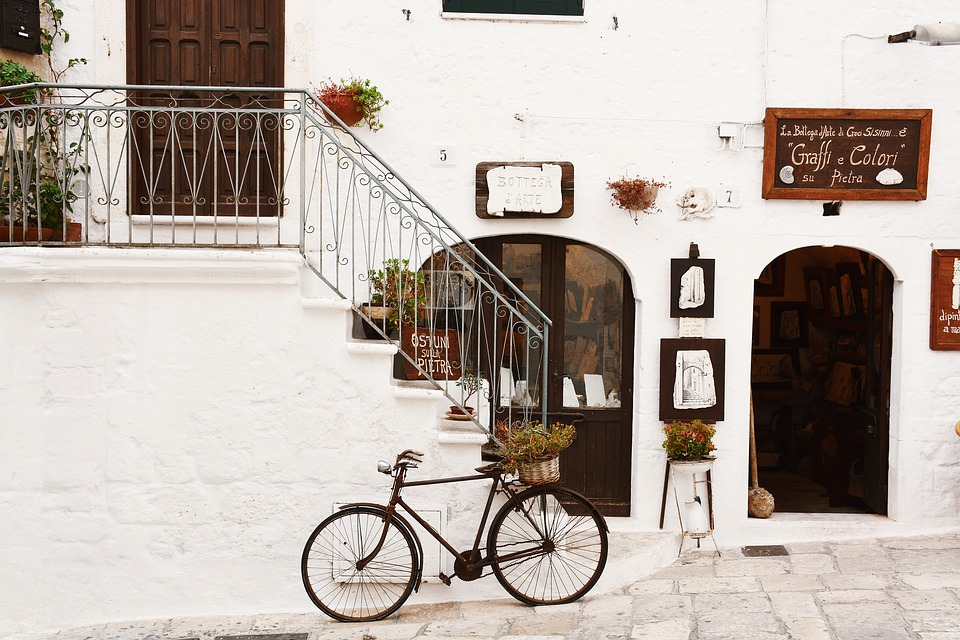

In [20]:
from PIL import Image, ImageDraw, ImageFont
from urllib.request import urlopen
image_url = "https://cloud.google.com/vision/docs/images/bicycle_example.png"
image = Image.open(urlopen(image_url))
image


In [9]:
objects = localize_objects_uri(image_url)

In [15]:
objects

[mid: "/m/0199g"
name: "Bicycle"
score: 0.906142712
bounding_poly {
  normalized_vertices {
    x: 0.310546875
    y: 0.6640625
  }
  normalized_vertices {
    x: 0.6328125
    y: 0.6640625
  }
  normalized_vertices {
    x: 0.6328125
    y: 0.96875
  }
  normalized_vertices {
    x: 0.310546875
    y: 0.96875
  }
}
, mid: "/m/02dgv"
name: "Door"
score: 0.757743716
bounding_poly {
  normalized_vertices {
    x: 0.129882812
    y: 0.00164794922
  }
  normalized_vertices {
    x: 0.30078125
    y: 0.00164794922
  }
  normalized_vertices {
    x: 0.30078125
    y: 0.357421875
  }
  normalized_vertices {
    x: 0.129882812
    y: 0.357421875
  }
}
, mid: "/m/0h9mv"
name: "Tire"
score: 0.754411
bounding_poly {
  normalized_vertices {
    x: 0.314453125
    y: 0.7890625
  }
  normalized_vertices {
    x: 0.4375
    y: 0.7890625
  }
  normalized_vertices {
    x: 0.4375
    y: 0.9765625
  }
  normalized_vertices {
    x: 0.314453125
    y: 0.9765625
  }
}
, mid: "/m/0h9mv"
name: "Tire"
score:

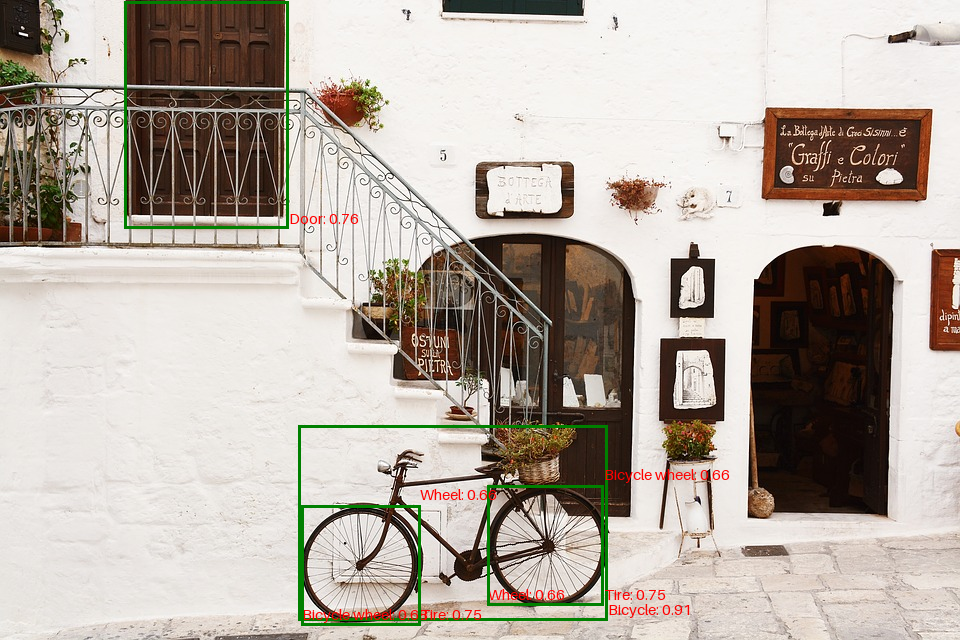

In [34]:
def draw_boxes(image, objects):
    image = image.copy()
    draw = ImageDraw.Draw(image)
    width, height = image.size
    has_text = set()
    try:
        font = ImageFont.truetype("arial.ttf", 15)
    except IOError:
        font = ImageFont.load_default(15)

    for object_ in objects:
        box = object_.bounding_poly.normalized_vertices
        draw.rectangle([
            (box[0].x * width, box[0].y * height),
            (box[2].x * width, box[2].y * height)
        ], outline='green', width=3)
        
        for i in [2,3,1,0]:
            x, y = box[i].x, box[i].y
            if (x, y) in has_text:
                next
            else:
                draw.text((x * width, y * height - 20),
                    f"{object_.name}: {object_.score:.2f}",
                    font=font, fill='red')
                has_text.add((x,y))
                break
    image.show()

draw_boxes(image, objects)